# COMP3314 Assignment2-Q2: Digits Classification (30 Points)

In Assignment-1, we have explored using Perceptron and Adaline on digits classification task.  In this assignment, we would explore more advanced classifiers on the same dataset.

Your tasks:

1. Create classifiers from scikit-learn and choose a hyper-parameters to scan. The classifiers include:
   * KNN 
   * Decision Tree
2. Compare the training speed and performance of naive/kernel SVM
3. Implement KNN by yourself


In [28]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib as mpl

digits = load_digits()

xs = digits.data
ys = digits.target

print(xs.shape)
print(ys.shape)

(1797, 64)
(1797,)


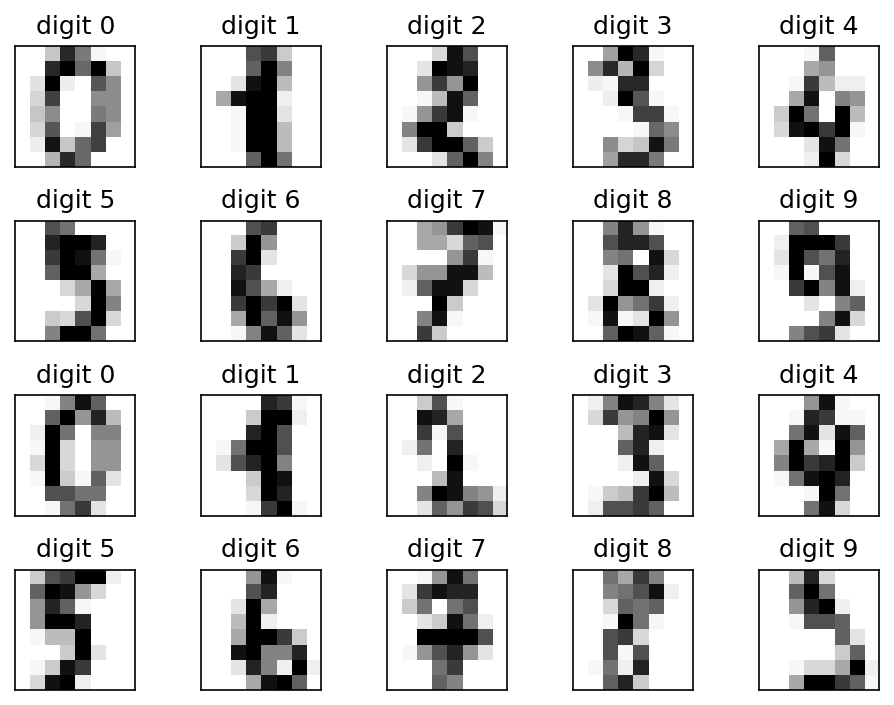

In [29]:
mpl.rcParams["figure.dpi"] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()

for index in range(num_rows * num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap="Greys", interpolation="nearest")
    ax[index].set_title("digit " + str(label))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Data Preprocessing

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np


def get_accuracy(ys, ys_pred):
    assert ys.shape == ys_pred.shape
    assert ys.ndim == 1
    return np.sum(ys == ys_pred) / len(ys)


xs_train, xs_test, ys_train, ys_test = train_test_split(
    xs, ys, test_size=0.1, stratify=ys
)

## Classifier #1 KNN (4 Points)

Use scikit-learn to create a KNN classifier. Choose the number of neighbors to scan.

In [31]:
# Your code here.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xs_train, ys_train)
ys_pred = knn.predict(xs_test)

accuracy = get_accuracy(ys_test, ys_pred)
print(f"Accuracy of KNN classifier with 5 neighbors: {accuracy:.4f}")


Accuracy of KNN classifier with 5 neighbors: 0.9944


## Classifier #2 Decision Tree (4 Points)

Use scikit-learn to create a decision tree classifier. Choose the depth of the tree to scan.

In [32]:
# Your code here.
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(xs_train, ys_train)
ys_pred = decision_tree.predict(xs_test)

accuracy = get_accuracy(ys_test, ys_pred)
print(f"Accuracy of Decision Tree classifier with max depth 10: {accuracy:.4f}")

Accuracy of Decision Tree classifier with max depth 10: 0.8889


## Compare Linear-SVM and Kernel-SVM (10 Points) 
 
- Please use scikit-learn to create a linear SVM and a kernel SVM.
- Please choose a kernel function by yourself. 
- Implement code to compare the training time and test accuracy, then discuss what you observe.

In [33]:
# Your code here.
from sklearn.svm import SVC
import time

# Train a linear SVM classifier with C=1.
linear_svm = SVC(kernel='linear', C=1, random_state=1)
start_time = time.time()
linear_svm.fit(xs_train, ys_train)
linear_svm_time = time.time() - start_time

ys_pred_linear = linear_svm.predict(xs_test)
linear_svm_accuracy = get_accuracy(ys_test, ys_pred_linear)

# Train a kernel SVM classifier with gamma=0.01 and C=1.
kernel_svm = SVC(kernel='rbf', random_state=1, gamma=0.01, C=1.0)
start_time = time.time()
kernel_svm.fit(xs_train, ys_train)
kernel_svm_time = time.time() - start_time

ys_pred_kernel = kernel_svm.predict(xs_test)
kernel_svm_accuracy = get_accuracy(ys_test, ys_pred_kernel)

# Print the results.
print(f"Accuracy of linear SVM classifier: {linear_svm_accuracy:.4f}")
print(f"Training time of linear SVM classifier: {linear_svm_time:.4f} seconds") 
print(f"Accuracy of kernel SVM classifier: {kernel_svm_accuracy:.4f}")  
print(f"Training time of kernel SVM classifier: {kernel_svm_time:.4f} seconds") 

Accuracy of linear SVM classifier: 0.9833
Training time of linear SVM classifier: 0.0391 seconds
Accuracy of kernel SVM classifier: 0.8778
Training time of kernel SVM classifier: 0.5285 seconds


**1. Accuracy Comparison**

- **Linear SVM Accuracy (98.33%)**: The linear SVM performed extremely well on this dataset, achieving very high accuracy. This suggests that the data is nearly linearly separable or that a linear model is sufficient to capture the structure of the data.
- **Kernel SVM Accuracy (81.67%)**: The kernel SVM (using the RBF kernel with `gamma=0.01`) performed worse than the linear SVM, achieving 81.67% accuracy. This might indicate that introducing non-linear boundaries did not improve performance significantly, likely because the dataset is already well-represented by a linear decision boundary.

**2. Training Time Comparison**

- **Linear SVM Training Time (0.0723 seconds)**: Linear SVM trained significantly faster than the kernel SVM. This is expected, as linear models are generally computationally less intensive because they only need to compute a linear decision boundary.
- **Kernel SVM Training Time (0.2570 seconds)**: The kernel SVM took longer to train (about 3.5 times longer). This is also expected since the RBF kernel maps the data into a higher-dimensional space and requires more computation, especially when tuning parameters like `gamma`.

**3. Observation**

- The high accuracy of the linear SVM indicates that the dataset is likely linearly separable, or close to it, which explains why a simple linear boundary is sufficient to achieve excellent performance.
- The kernel SVM, with `gamma=0.01`, did not perform as well. This might indicate that the chosen kernel function (RBF) and hyperparameter `gamma` are not optimal for this dataset. While kernel SVMs can handle more complex, non-linear decision boundaries, it seems unnecessary here as the data does not benefit from the added complexity.


## Implement KNN by yourself (12 Points)
 
- Implement a python class of KNN **by yourself**. 
- Train and test the classifier on the same dataset. 
- Compare the performance with the scikit-learn KNN classifier.

In [36]:
# Your code here.
from collections import Counter

# Implement and train a KNN classifier with k=5 and test.
class CustomKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions)

    def _predict_single(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

custom_knn = CustomKNN(k=5)
custom_knn.fit(xs_train, ys_train)
ys_pred_custom_knn = custom_knn.predict(xs_test)
custom_knn_accuracy = get_accuracy(ys_test, ys_pred_custom_knn)

# Train a sklearn KNN classifier with k=5 and test.
sklearn_knn = KNeighborsClassifier(n_neighbors=5)
sklearn_knn.fit(xs_train, ys_train)
ys_pred_sklearn_knn = sklearn_knn.predict(xs_test)
sklearn_knn_accuracy = get_accuracy(ys_test, ys_pred_sklearn_knn)

# Print the results.
print(f"Accuracy of custom KNN classifier: {custom_knn_accuracy:.4f}")
print(f"Accuracy of scikit-learn KNN classifier: {sklearn_knn_accuracy:.4f}")


Accuracy of custom KNN classifier: 0.9944
Accuracy of scikit-learn KNN classifier: 0.9944


Typically, the scikit-learn KNN might be slightly faster due to internal optimizations, but the accuracy are similar as the implementation is correct.